# ***Importamos librerías básicas***

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from PIL import Image
import random
import yaml
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics 8.3.151 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6358.0/8062.4 GB disk)


# ***Dividimos el conjunto de datos en una división 70 20 10***

In [5]:
# 1. División del conjunto de datos
img_path = '/kaggle/input/plantvillage-for-object-detection-yolo/PlantVillage_for_object_detection/Dataset/images'
label_path = '/kaggle/input/plantvillage-for-object-detection-yolo/PlantVillage_for_object_detection/Dataset/labels'

ipaths, types = [], []
for dirname, _, filenames in os.walk(img_path):
    for filename in filenames:
        ipaths.append(os.path.join(dirname, filename))
        types.append(filename.split('.')[-1])
tpaths = []
for dirname, _, filenames in os.walk(label_path):
    for filename in filenames:
        tpaths.append(os.path.join(dirname, filename))
ipaths = sorted(ipaths)
tpaths = sorted(tpaths)
paths = list(zip(ipaths, tpaths))
random.shuffle(paths)
paths = paths[:54293]  # Ajusta según tu dataset
ipaths = [p[0] for p in paths]
tpaths = [p[1] for p in paths]

print(f"Number of images collected: {len(ipaths)}")
print(f"Number of labels collected: {len(tpaths)}")
print(f"Number of paired paths: {len(paths)}")

total_pairs = len(paths)
num_train = int(total_pairs * 0.70)
num_valid = int(total_pairs * 0.20)
num_test = total_pairs - (num_train + num_valid)

for folder in ['train', 'valid', 'test']:
    os.makedirs(f'datasets/{folder}', exist_ok=True)

count_train = 0
count_valid = 0
count_test = 0
for i, (ipath, tpath) in enumerate(zip(ipaths, tpaths)):
    if i < num_train:
        copyfile(ipath, f'datasets/train/{os.path.basename(ipath)}')
        copyfile(tpath, f'datasets/train/{os.path.basename(tpath)}')
        count_train += 1
    elif i < num_train + num_valid:
        copyfile(ipath, f'datasets/valid/{os.path.basename(ipath)}')
        copyfile(tpath, f'datasets/valid/{os.path.basename(tpath)}')
        count_valid += 1
    else:
        copyfile(ipath, f'datasets/test/{os.path.basename(ipath)}')
        copyfile(tpath, f'datasets/test/{os.path.basename(tpath)}')
        count_test += 1

print(f'Files copied to train folder: {count_train}')
print(f'Files copied to valid folder: {count_valid}')
print(f'Files copied to test folder: {count_test}')

Number of images collected: 54293
Number of labels collected: 54293
Number of paired paths: 54293
Files copied to train folder: 38005
Files copied to valid folder: 10858
Files copied to test folder: 5430


# ***Creación de un archivo Yaml***

In [9]:
# 2. YAML automático con nombres de clase reales
with open('/kaggle/input/plantvillage-for-object-detection-yolo/PlantVillage_for_object_detection/Dataset/classes.yaml', 'r') as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml['names']
plantdata_yaml = dict(
    train='datasets/train',
    val='datasets/valid',
    test='datasets/test',
    nc=len(class_names),
    names=class_names
)
with open('plantdata.yaml', 'w') as outfile:
    yaml.dump(plantdata_yaml, outfile, default_flow_style=True)

# ***Entrenamiento***

In [10]:
# 3. Entrenamiento YOLOv9
model = YOLO('yolov9c.pt')
model.train(
    data='plantdata.yaml',
    epochs=15,
    imgsz=640,
    name="plantvillage_yolo_train3",
    exist_ok=True,
    verbose=True,
    save=True,
    cache=True,
    plots=True
)

100%|██████████| 49.4M/49.4M [00:00<00:00, 109MB/s] 


Ultralytics 8.3.151 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=plantdata.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9c.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=plantvillage_yolo_train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

100%|██████████| 755k/755k [00:00<00:00, 17.3MB/s]
2025-06-07 10:31:11,461	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-06-07 10:31:11,956	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=38

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 512.3±167.9 MB/s, size: 18.5 KB)


train: Scanning /kaggle/working/datasets/train... 38005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38005/38005 [00:25<00:00, 1492.66it/s]


train: New cache created: /kaggle/working/datasets/train.cache
WARNING ⚠️ train: 65.2GB RAM required to cache images with 50% safety margin but only 28.9/31.4GB available, not caching images
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 243.3±193.4 MB/s, size: 15.0 KB)


val: Scanning /kaggle/working/datasets/valid... 10858 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10858/10858 [00:07<00:00, 1393.52it/s]


val: New cache created: /kaggle/working/datasets/valid.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (12.4GB RAM): 100%|██████████| 10858/10858 [00:10<00:00, 1060.72it/s]


Plotting labels to runs/detect/plantvillage_yolo_train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000238, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/plantvillage_yolo_train3
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      10.9G     0.4005      1.112      1.108         12        640: 100%|██████████| 2376/2376 [36:11<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:24<00:00,  1.66it/s]

                   all      10858      10873      0.929      0.926      0.975      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15        11G     0.3669     0.5709       1.07         13        640: 100%|██████████| 2376/2376 [35:41<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:23<00:00,  1.67it/s]

                   all      10858      10873      0.931      0.957       0.98      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15        11G     0.3556     0.5048      1.061         15        640: 100%|██████████| 2376/2376 [35:27<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:23<00:00,  1.67it/s]

                   all      10858      10873      0.951      0.971      0.985      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15        11G     0.3413     0.4496       1.05         14        640: 100%|██████████| 2376/2376 [35:22<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:22<00:00,  1.68it/s]

                   all      10858      10873       0.97      0.981      0.991      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15        11G     0.3268      0.396       1.04         13        640: 100%|██████████| 2376/2376 [35:22<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:22<00:00,  1.68it/s]

                   all      10858      10873      0.981      0.983       0.99      0.982


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15        11G     0.1334     0.2162     0.9349          5        640: 100%|██████████| 2376/2376 [35:22<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:22<00:00,  1.68it/s]

                   all      10858      10873      0.984      0.979       0.99      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      11.1G     0.1211     0.1775     0.9273          5        640: 100%|██████████| 2376/2376 [35:21<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:22<00:00,  1.68it/s]

                   all      10858      10873      0.983      0.988      0.992      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15        11G     0.1146     0.1524     0.9228          5        640: 100%|██████████| 2376/2376 [35:20<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:22<00:00,  1.68it/s]

                   all      10858      10873       0.99      0.988      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15        11G     0.1103     0.1365     0.9207          5        640: 100%|██████████| 2376/2376 [35:20<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:23<00:00,  1.67it/s]

                   all      10858      10873      0.989      0.988      0.993      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15        11G     0.1057     0.1191      0.917          5        640: 100%|██████████| 2376/2376 [35:20<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:22<00:00,  1.68it/s]

                   all      10858      10873      0.993       0.99      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15        11G     0.1022     0.1096     0.9143          5        640: 100%|██████████| 2376/2376 [35:20<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:23<00:00,  1.67it/s]

                   all      10858      10873      0.994      0.992      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15        11G    0.09785    0.09602     0.9124          5        640: 100%|██████████| 2376/2376 [35:33<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:26<00:00,  1.65it/s]

                   all      10858      10873      0.994      0.993      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15        11G    0.09355    0.08486     0.9073          5        640: 100%|██████████| 2376/2376 [35:37<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:27<00:00,  1.64it/s]

                   all      10858      10873      0.995      0.993      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15        11G    0.08898    0.07585     0.9054          5        640: 100%|██████████| 2376/2376 [35:36<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:26<00:00,  1.65it/s]

                   all      10858      10873      0.996      0.993      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15        11G    0.08556    0.06791     0.9047          5        640: 100%|██████████| 2376/2376 [35:28<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:23<00:00,  1.67it/s]

                   all      10858      10873      0.996      0.993      0.994      0.991



15 epochs completed in 9.732 hours.
Optimizer stripped from runs/detect/plantvillage_yolo_train3/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/plantvillage_yolo_train3/weights/best.pt, 51.6MB

Validating runs/detect/plantvillage_yolo_train3/weights/best.pt...
Ultralytics 8.3.151 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv9c summary (fused): 156 layers, 25,348,546 parameters, 0 gradients, 102.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [03:27<00:00,  1.64it/s]


                   all      10858      10873      0.996      0.993      0.994      0.991
    Apple___Apple_scab        106        106      0.995          1      0.995       0.99
     Apple___Black_rot        119        119      0.998          1      0.995      0.995
Apple___Cedar_apple_rust         50         50      0.996          1      0.995      0.995
       Apple___healthy        329        329      0.997          1      0.995      0.993
   Blueberry___healthy        301        301      0.999          1      0.995      0.995
Cherry___Powdery_mildew        187        187      0.999          1      0.995      0.994
      Cherry___healthy        177        177      0.999          1      0.995      0.995
Corn___Cercospora_leaf_spot Gray_leaf_spot        104        105       0.97      0.914      0.974      0.958
    Corn___Common_rust        271        271          1      0.998      0.995      0.992
Corn___Northern_Leaf_Blight        205        207      0.973      0.957      0.991     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dda4dd312a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,  

# ***Comprobación de Resultados***

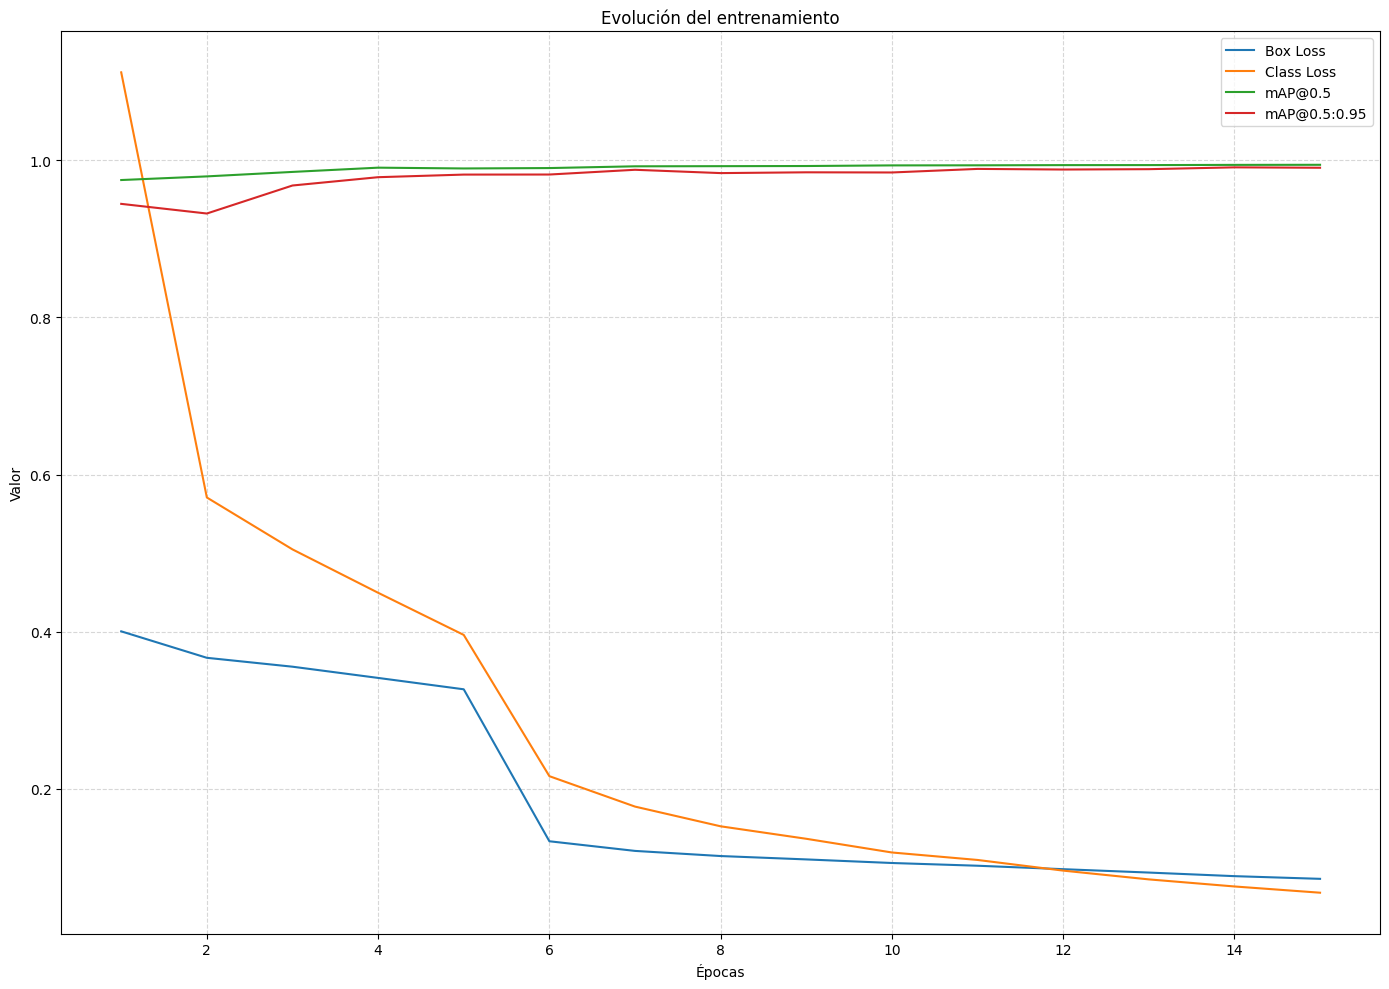

In [13]:
# 4. Visualización de resultados de entrenamiento
if os.path.exists("runs/detect/plantvillage_yolo_train3/results.csv"):
    df = pd.read_csv("runs/detect/plantvillage_yolo_train3/results.csv")
    plt.figure(figsize=(14, 10))
    plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')
    plt.plot(df['epoch'], df['train/cls_loss'], label='Class Loss')
    plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
    plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
    plt.xlabel("Épocas")
    plt.ylabel("Valor")
    plt.title("Evolución del entrenamiento")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [14]:
# 5. Exportar mejor modelo como PhytoGuard.pt
shutil.copy("runs/detect/plantvillage_yolo_train3/weights/best.pt", "PhytoGuard.pt")
print("✅ Modelo exportado como PhytoGuard.pt")

✅ Modelo exportado como PhytoGuard.pt


In [15]:
# 6. Diccionario de descripciones y recomendaciones en español para cada clase
class_info = [
    ("Sarna del manzano", "Hongo que causa manchas oscuras en hojas y frutos de manzano.", "Aplicar fungicida recomendado y eliminar hojas caídas."),
    ("Pudrición negra del manzano", "Hongo que provoca pudrición y lesiones en ramas y frutos.", "Eliminar ramas afectadas y aplicar cobre."),
    ("Roya del cedro-manzano", "Hongo que produce manchas anaranjadas en hojas de manzano.", "Plantar variedades resistentes y eliminar fuentes de infección."),
    ("Manzano sano", "Manzano sin síntomas de enfermedad.", "No requiere acción."),
    ("Arándano sano", "Arándano sin síntomas de enfermedad.", "No requiere acción."),
    ("Oídio del cerezo", "Hongo que causa polvo blanco en hojas de cerezo.", "Aplicar fungicidas a base de azufre."),
    ("Cerezo sano", "Cerezo sin síntomas de enfermedad.", "No requiere acción."),
    ("Mancha gris de la hoja del maíz", "Hongo que causa manchas grises en hojas de maíz.", "Rotar cultivos y usar híbridos resistentes."),
    ("Roya común del maíz", "Hongo que produce pústulas rojizas en hojas de maíz.", "Aplicar fungicida específico."),
    ("Tizón del norte de la hoja del maíz", "Hongo que causa lesiones alargadas en hojas de maíz.", "Rotar cultivos y aplicar fungicidas."),
    ("Maíz sano", "Maíz sin síntomas de enfermedad.", "No requiere acción."),
    ("Pudrición negra de la vid", "Hongo que afecta hojas y frutos de la vid.", "Eliminar partes infectadas y aplicar fungicida."),
    ("Esca (Yesca) de la vid", "Enfermedad fúngica que causa necrosis en la vid.", "Podar y eliminar plantas infectadas."),
    ("Mildiu de la vid", "Hongo que produce manchas amarillas y moho en hojas de vid.", "Aplicar mezcla bordelesa."),
    ("Vid sana", "Vid sin síntomas de enfermedad.", "No requiere acción."),
    ("Huanglongbing (HLB) de cítricos", "Bacteria que causa amarillamiento y deformación en cítricos.", "Controlar población de psílidos."),
    ("Mancha bacteriana del duraznero", "Bacteria que produce manchas oscuras en hojas y frutos.", "Aplicar cobre fijo."),
    ("Duraznero sano", "Duraznero sin síntomas de enfermedad.", "No requiere acción."),
    ("Mancha bacteriana del pimiento", "Bacteria que causa manchas en hojas y frutos de pimiento.", "Aplicar cobre y eliminar restos infectados."),
    ("Pimiento sano", "Pimiento sin síntomas de enfermedad.", "No requiere acción."),
    ("Tizón temprano de la papa", "Hongo que produce manchas oscuras en hojas de papa.", "Aplicar fungicida específico."),
    ("Tizón tardío de la papa", "Hongo que causa pudrición rápida en hojas y tubérculos.", "Eliminar follaje afectado y aplicar fungicidas."),
    ("Papa sana", "Papa sin síntomas de enfermedad.", "No requiere acción."),
    ("Frambuesa sana", "Frambuesa sin síntomas de enfermedad.", "No requiere acción."),
    ("Soja sana", "Soja sin síntomas de enfermedad.", "No requiere acción."),
    ("Oídio de la calabaza", "Hongo que causa polvo blanco en hojas de calabaza.", "Aplicar bicarbonato de potasio."),
    ("Quemadura de la hoja de la fresa", "Hongo que produce manchas marrones en hojas de fresa.", "Eliminar hojas infectadas y mejorar ventilación."),
    ("Fresa sana", "Fresa sin síntomas de enfermedad.", "No requiere acción."),
    ("Mancha bacteriana del tomate", "Bacteria que causa manchas en hojas y frutos de tomate.", "Aplicar bactericidas a base de cobre."),
    ("Tizón temprano del tomate", "Hongo que produce manchas concéntricas en hojas de tomate.", "Poda y aplicar fungicida."),
    ("Tizón tardío del tomate", "Hongo que causa necrosis rápida en tomate.", "Eliminar plantas afectadas y usar variedades resistentes."),
    ("Moho de la hoja del tomate", "Hongo que produce moho en el envés de las hojas.", "Mejorar ventilación y aplicar fungicidas."),
    ("Septoria del tomate", "Hongo que causa manchas circulares en hojas de tomate.", "Aplicar fungicidas y rotar cultivos."),
    ("Ácaros (Araña roja) en tomate", "Ácaros que producen punteado y telarañas en hojas.", "Usar acaricidas o aceite de neem."),
    ("Mancha diana del tomate", "Hongo que produce manchas circulares con centro claro.", "Aplicar fungicidas y rotar cultivos."),
    ("Virus del enrollamiento amarillo de la hoja", "Virus que causa enrollamiento y amarillamiento en tomate.", "Controlar mosca blanca con insecticidas."),
    ("Virus del mosaico del tomate", "Virus que produce mosaico y deformación en hojas.", "Desinfectar herramientas y manos."),
    ("Tomate sano", "Tomate sin síntomas de enfermedad.", "No requiere acción.")
]

def custom_action_on_class(class_id):
    nombre, descripcion, recomendacion = class_info[class_id]
    print(f"\n--- Diagnóstico ---")
    print(f"Clase detectada: {nombre}")
    print(f"Descripción: {descripcion}")
    print(f"Recomendación: {recomendacion}\n")



0: 640x640 1 Apple___Apple_scab, 31.6ms
1: 640x640 1 Apple___Apple_scab, 31.6ms
Speed: 2.6ms preprocess, 31.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Detectado: Sarna del manzano (Confianza: 0.99)

--- Diagnóstico ---
Clase detectada: Sarna del manzano
Descripción: Hongo que causa manchas oscuras en hojas y frutos de manzano.
Recomendación: Aplicar fungicida recomendado y eliminar hojas caídas.



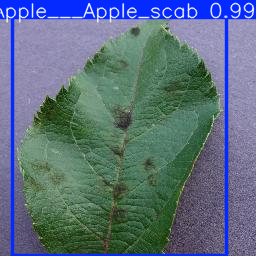

Detectado: Sarna del manzano (Confianza: 0.97)

--- Diagnóstico ---
Clase detectada: Sarna del manzano
Descripción: Hongo que causa manchas oscuras en hojas y frutos de manzano.
Recomendación: Aplicar fungicida recomendado y eliminar hojas caídas.



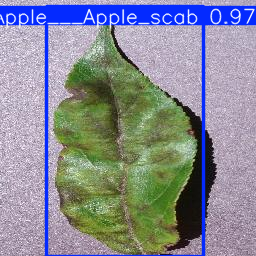


✅ Pipeline completo, modelo listo para producción y documentación profesional.


In [17]:
# 7. Ejemplo de inferencia y reporte
model = YOLO("/kaggle/working/PhytoGuard.pt")
imagenes_prueba = ["/kaggle/input/plantvillage-for-object-detection-yolo/PlantVillage_for_object_detection/Dataset/images/APAS_image (103).jpg", "/kaggle/input/plantvillage-for-object-detection-yolo/PlantVillage_for_object_detection/Dataset/images/APAS_image (147).jpg"]  # Cambia por tus imágenes reales
results = model(imagenes_prueba)
for result in results:
    for box in result.boxes:
        class_id = int(box.cls)
        confianza = box.conf.item()
        print(f"Detectado: {class_info[class_id][0]} (Confianza: {confianza:.2f})")
        custom_action_on_class(class_id)
    result.show()
    result.save(filename="resultado.jpg")

print("\n✅ Pipeline completo, modelo listo para producción y documentación profesional.")


Ultralytics 8.3.151 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 370.3±186.3 MB/s, size: 15.2 KB)


val: Scanning /kaggle/working/datasets/valid.cache... 10858 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10858/10858 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 679/679 [03:39<00:00,  3.09it/s]


                   all      10858      10873      0.996      0.993      0.994      0.991
    Apple___Apple_scab        106        106      0.995          1      0.995       0.99
     Apple___Black_rot        119        119      0.998          1      0.995      0.995
Apple___Cedar_apple_rust         50         50      0.996          1      0.995      0.995
       Apple___healthy        329        329      0.997          1      0.995      0.993
   Blueberry___healthy        301        301      0.999          1      0.995      0.995
Cherry___Powdery_mildew        187        187      0.999          1      0.995      0.994
      Cherry___healthy        177        177      0.999          1      0.995      0.995
Corn___Cercospora_leaf_spot Gray_leaf_spot        104        105       0.97      0.913      0.974      0.958
    Corn___Common_rust        271        271          1      0.998      0.995      0.992
Corn___Northern_Leaf_Blight        205        207      0.974      0.957      0.991     

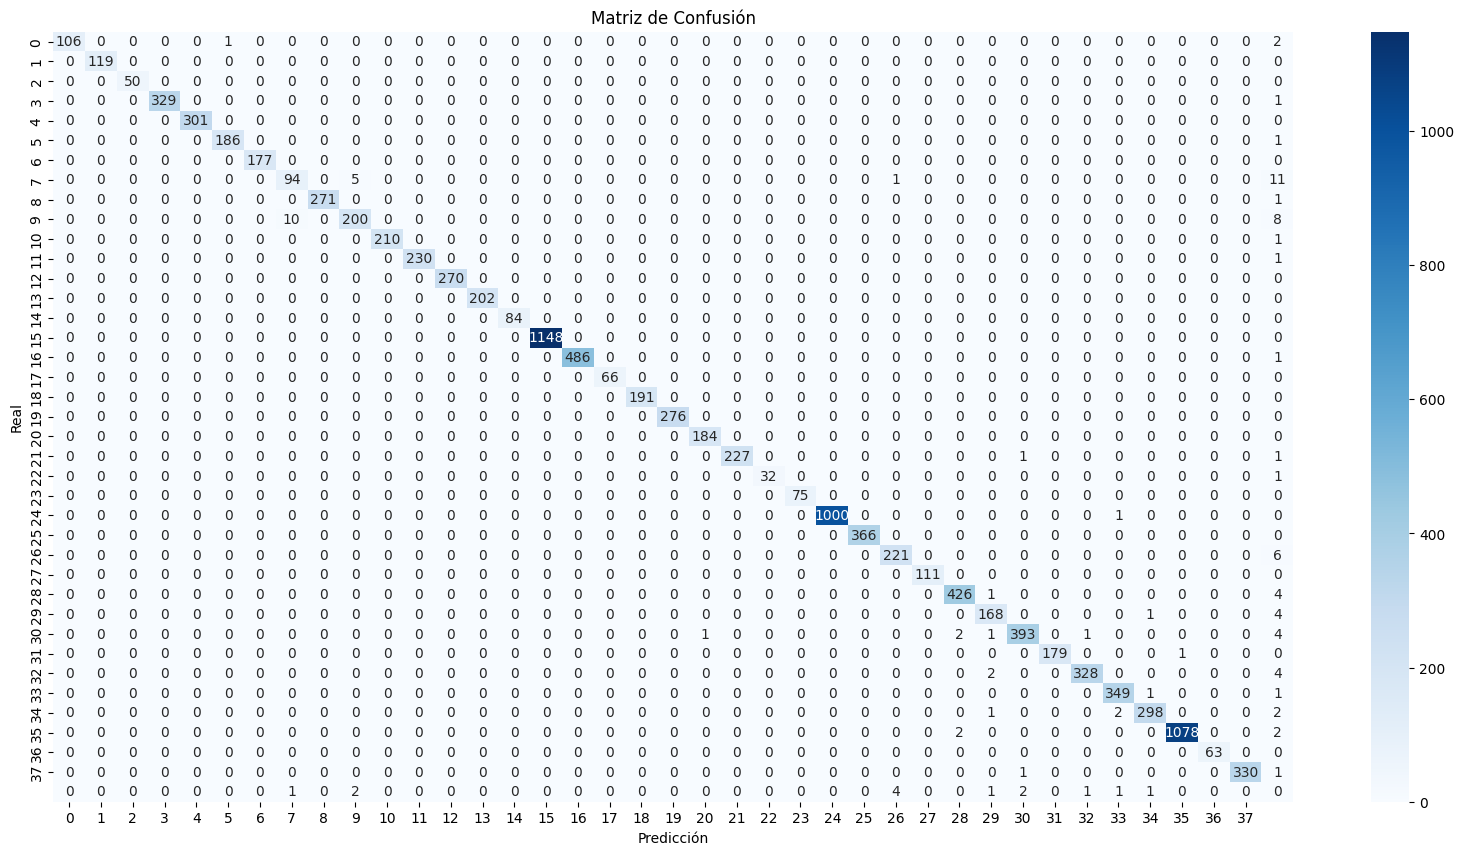

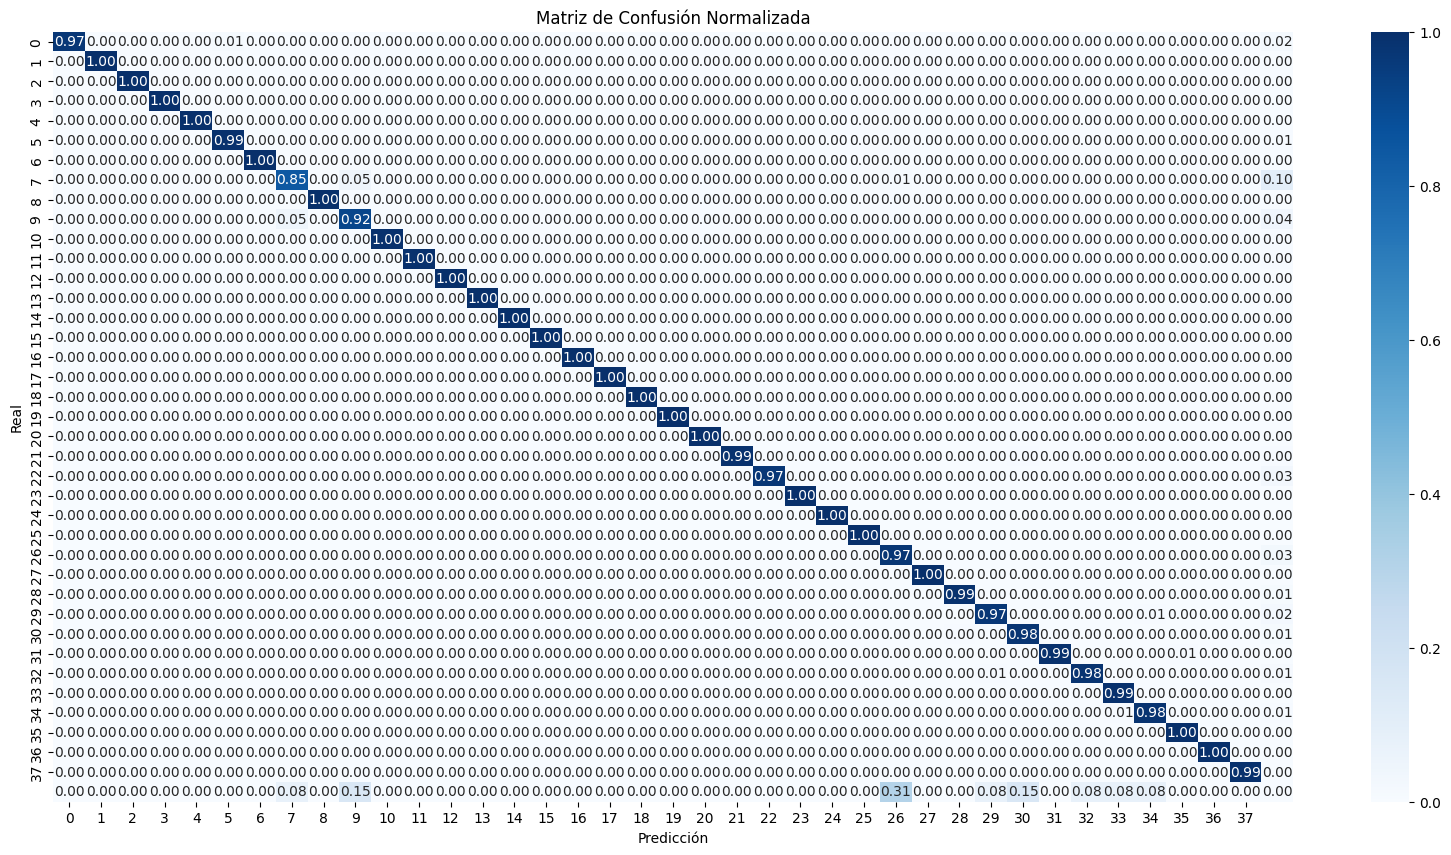


Resumen de precisión por clase:


<bound method DetMetrics.class_result of ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7de09a6475b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,

In [21]:
# 8. Análisis de predicciones y métricas avanzadas con Ultralytics v8+

# Evaluación sobre el set de validación/test
val_results = model.val()  # Esto ya imprime el resumen de métricas

# Matriz de confusión
cm = val_results.confusion_matrix.matrix  # numpy array
class_names = val_results.names

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Matriz de confusión normalizada
cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(20,10))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión Normalizada')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Tabla resumen de métricas por clase
import pandas as pd
df_metrics = val_results.class_result  # DataFrame con métricas por clase
print("\nResumen de precisión por clase:")
display(df_metrics)

In [23]:
# Zip a todo menos la carpeta datasets
!cd /kaggle/working && zip -r results_no_datasets.zip . -x "datasets/*"

# Descarga deL zip generado
from IPython.display import FileLink
FileLink('/kaggle/working/results_no_datasets.zip')

updating: plantdata.yaml (deflated 59%)
updating: runs/ (stored 0%)
updating: runs/detect/ (stored 0%)
updating: runs/detect/val2/ (stored 0%)
updating: runs/detect/val2/P_curve.png (deflated 20%)
updating: runs/detect/val2/confusion_matrix.png (deflated 15%)
updating: runs/detect/val2/val_batch1_labels.jpg (deflated 6%)
updating: runs/detect/val2/val_batch1_pred.jpg (deflated 6%)
updating: runs/detect/val2/R_curve.png (deflated 17%)
updating: runs/detect/val2/val_batch2_pred.jpg (deflated 6%)
updating: runs/detect/val2/PR_curve.png (deflated 25%)
updating: runs/detect/val2/val_batch0_pred.jpg (deflated 7%)
updating: runs/detect/val2/val_batch0_labels.jpg (deflated 7%)
updating: runs/detect/val2/val_batch2_labels.jpg (deflated 6%)
updating: runs/detect/val2/confusion_matrix_normalized.png (deflated 15%)
updating: runs/detect/val2/F1_curve.png (deflated 16%)
updating: runs/detect/val/ (stored 0%)
updating: runs/detect/val/P_curve.png (deflated 20%)
updating: runs/detect/val/confusion_ma

/kaggle/working/results_no_datasets.zip